In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from data import split, gen_lin_separable_data, gen_non_lin_separable_data, gen_lin_separable_overlap_data
from visualize import plot_margin, plot_contour
from svm import CVX, SMO, linear_kernel, polynomial_kernel, gaussian_kernel, rbf_kernel

# Linearly separable data

In [2]:
X1, y1, X2, y2 = gen_lin_separable_data()
X_train, y_train, X_test, y_test = split(X1, y1, X2, y2)

     pcost       dcost       gap    pres   dres
 0:  1.9037e+05 -1.4908e+08  4e+08  5e-01  7e-12
 1:  4.7636e+05 -1.8972e+07  3e+07  3e-02  1e-11
 2:  4.1359e+05 -1.9206e+06  3e+06  2e-03  3e-12
 3:  1.0580e+05 -1.2640e+05  2e+05  2e-05  7e-13
 4:  1.5350e+04 -1.7074e+04  3e+04  7e-14  5e-13
 5:  2.1761e+03 -2.4802e+03  5e+03  7e-15  2e-13
 6:  3.0220e+02 -3.6438e+02  7e+02  1e-14  8e-14
 7:  3.9242e+01 -5.6023e+01  1e+02  3e-15  3e-14
 8:  3.5359e+00 -9.7726e+00  1e+01  4e-16  1e-14
 9:  5.1251e-01 -6.4443e+00  7e+00  1e-15  6e-15
10: -1.9971e+00 -8.0128e+00  6e+00  9e-16  5e-15
11: -5.0022e+00 -5.6774e+00  7e-01  4e-15  6e-15
12: -5.3540e+00 -5.4486e+00  9e-02  2e-15  6e-15
13: -5.4066e+00 -5.4082e+00  2e-03  8e-15  6e-15
14: -5.4075e+00 -5.4075e+00  2e-05  4e-15  6e-15
15: -5.4075e+00 -5.4075e+00  2e-07  2e-16  6e-15
Optimal solution found.
40 out of 40 predictions correct


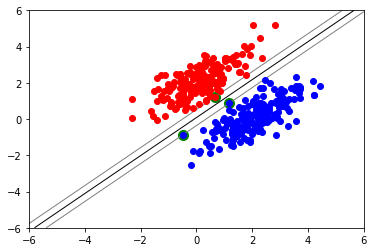

In [3]:
clf = CVX(kernel_function=linear_kernel)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print("{} out of {} predictions correct".format(correct, len(y_predict)))

plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

40 out of 40 predictions correct


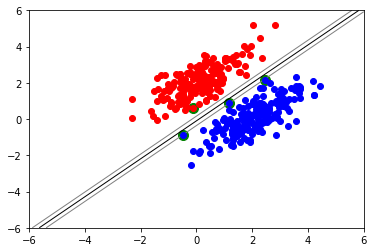

In [4]:
clf = SMO(kernel_function=linear_kernel)
clf.fit(X_train, y_train.ravel())

y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print("{} out of {} predictions correct".format(correct, len(y_predict)))

plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

# Nonlinearly separable data

In [5]:
X1, y1, X2, y2 = gen_non_lin_separable_data()
X_train, y_train, X_test, y_test = split(X1, y1, X2, y2)

     pcost       dcost       gap    pres   dres
 0:  7.9206e+06 -6.4388e+07  8e+07  6e-02  2e-12
 1:  3.3642e+06 -6.7694e+06  1e+07  7e-03  2e-12
 2:  6.2859e+05 -9.9074e+05  2e+06  2e-04  1e-12
 3:  9.4875e+04 -1.3628e+05  2e+05  5e-13  6e-13
 4:  1.3027e+04 -1.7264e+04  3e+04  5e-13  2e-13
 5:  1.5413e+03 -2.7458e+03  4e+03  1e-13  9e-14
 6:  2.0778e+02 -8.7379e+02  1e+03  2e-16  4e-14
 7: -3.5193e+01 -6.1477e+02  6e+02  2e-13  3e-14
 8: -1.9813e+02 -6.3000e+02  4e+02  2e-16  6e-14
 9: -3.1231e+02 -4.6995e+02  2e+02  3e-13  6e-14
10: -3.5995e+02 -4.1699e+02  6e+01  2e-13  7e-14
11: -3.8193e+02 -3.8530e+02  3e+00  6e-14  7e-14
12: -3.8330e+02 -3.8336e+02  6e-02  6e-14  8e-14
13: -3.8332e+02 -3.8332e+02  7e-04  2e-13  8e-14
14: -3.8332e+02 -3.8332e+02  7e-06  2e-13  9e-14
Optimal solution found.
20 out of 20 predictions correct


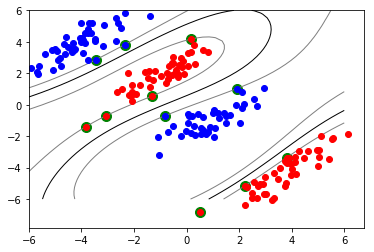

In [6]:
clf = CVX(gaussian_kernel)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print("{} out of {} predictions correct".format(correct, len(y_predict)))

plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

20 out of 20 predictions correct


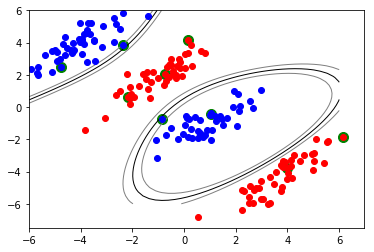

In [7]:
clf = SMO(kernel_function=gaussian_kernel)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print("{} out of {} predictions correct".format(correct, len(y_predict)))

plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

# Overlapping data

In [8]:
X1, y1, X2, y2 = gen_lin_separable_overlap_data()
X_train, y_train, X_test, y_test = split(X1, y1, X2, y2)

     pcost       dcost       gap    pres   dres
 0: -4.6905e+01 -3.4262e+02  2e+03  2e+00  1e-14
 1: -3.1324e+01 -1.8980e+02  3e+02  3e-01  1e-14
 2: -2.3068e+01 -5.5869e+01  5e+01  4e-02  9e-15
 3: -2.3285e+01 -3.1175e+01  1e+01  8e-03  6e-15
 4: -2.3986e+01 -2.8329e+01  5e+00  3e-03  6e-15
 5: -2.4585e+01 -2.6453e+01  2e+00  1e-03  7e-15
 6: -2.4996e+01 -2.5563e+01  6e-01  2e-04  8e-15
 7: -2.5162e+01 -2.5283e+01  1e-01  3e-05  7e-15
 8: -2.5211e+01 -2.5216e+01  5e-03  1e-06  7e-15
 9: -2.5213e+01 -2.5213e+01  5e-05  1e-08  8e-15
10: -2.5213e+01 -2.5213e+01  5e-07  1e-10  9e-15
Optimal solution found.
20 out of 20 predictions correct


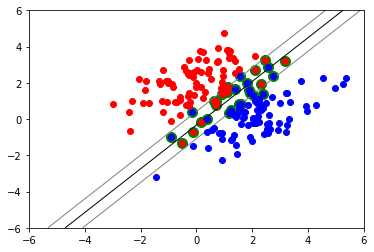

In [9]:
clf = CVX(kernel_function=linear_kernel, C=1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print("{} out of {} predictions correct".format(correct, len(y_predict)))

plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

20 out of 20 predictions correct


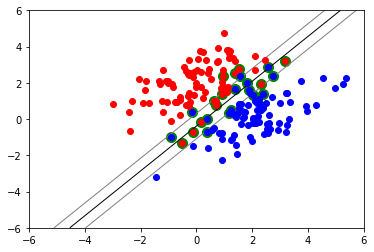

In [10]:
clf = SMO(kernel_function=linear_kernel, C=1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print("{} out of {} predictions correct".format(correct, len(y_predict)))

plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)